
## What about the hosts?


<ul>
<li><a href="#bu">1. Business Understanding.</a></li>
<li><a href="#du">2. Data Understanding.</a></li>    
<li><a href="#dp">3. Prepare Data.</a></li>
<li><a href="#md">4. Model Data</a></li>
<li><a href="#r">5. Results</a></li>
</ul>

<a id='intro'></a>
# 1. Business Understanding

Hi All!
Today we are going to take a look at "Boston Airbnb Open Data". The data has been downloaded from Kaggle.com, "Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA". The dataset has three parts:

1. Listings, including full descriptions and average review score
2. Reviews, including a unique id for each reviewer and detailed comments
3. Calendar, including listing id and the price and availability for that day

For our analysis, we are going to use Listings dataset. The project contains three notebooks, and each one of them exploring different questions:

1. The 1st notebook is about the hosts, trying to answer the questions above
2. In the 2nd will explore the price, and how is affected by location, property type, room type and bed type
3. And in the last notebook, we will try to build a model so we can predict the price.

Here we are going to answer the following questions:
1. Who host has the most listings and what is the average price of the host?
2. Which of the host has higher metrics in terms of response time, acceptanse rate, and response rate?

<a id='du'></a>
# 2. Data Understanding

Here we used the Boston AirBnb data to attempt to answer our questions of interest. In this case, using the data to help us arrive at our questions of interest. The complete dataset has three CSV files, we used listing CSV to answer our question since it contains much more information regarding listings, hosts, price, location.

A brief explanation for the columns that we are going to use:

host_name: Name of the host.

price: Price of the listing.

calculated_host_listings_count: Total number of apartments and bedrooms for each host.

host_response_time: Is the average amount of time that it took for the host to respond to all new messages in the past 30 days.

host_response_rate: Is the percentage of new inquiries and reservation requests the host responded to within 24 hours in the past 30 days.

host_acceptance_rate: Measures how often you accept or decline reservations.

The last two rates are important because, with some other metrics of Airbnb, gives to host the eligibility for Superhost or Plus host Programs.

<a id='dp'></a>
# 3. Prepare Data

In [178]:
# Import libraries
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
# Read csv to pandas
calendar = pd.read_csv('./calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [180]:
# Read csv to pandas
reviews = pd.read_csv('./reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [181]:
# Read csv to pandas
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


There are three CSV files in the complete dataset. As we can see from above the most interesting dataset is the "listings" and we are going to use for our analysis..

In [182]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

We are going to keep only the columns that are helpful to answer our questions.

In [183]:
# Create new dataframe with the columns we are keeping 
listings_host = listings[['host_name', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',  'calculated_host_listings_count', 'price']]
listings_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_name                       3585 non-null   object
 1   host_response_time              3114 non-null   object
 2   host_response_rate              3114 non-null   object
 3   host_acceptance_rate            3114 non-null   object
 4   calculated_host_listings_count  3585 non-null   int64 
 5   price                           3585 non-null   object
dtypes: int64(1), object(5)
memory usage: 168.2+ KB


In [184]:
listings_host['host_response_rate'].value_counts()

100%    2072
98%      195
90%      106
96%       90
89%       87
71%       62
99%       52
80%       38
92%       38
97%       36
94%       28
70%       23
95%       22
50%       21
79%       18
93%       18
77%       17
91%       17
73%       16
60%       15
67%       15
75%       14
0%        13
86%       11
78%       10
83%       10
81%        8
69%        7
85%        7
33%        6
88%        6
40%        5
30%        3
36%        3
82%        3
31%        2
61%        2
10%        2
84%        2
14%        2
43%        1
20%        1
19%        1
6%         1
25%        1
63%        1
17%        1
68%        1
64%        1
56%        1
57%        1
38%        1
Name: host_response_rate, dtype: int64

In [185]:
listings_host['host_acceptance_rate'].value_counts()

100%    1210
55%      139
91%      115
94%      113
98%       97
        ... 
18%        1
28%        1
53%        1
52%        1
51%        1
Name: host_acceptance_rate, Length: 72, dtype: int64

In [186]:
listings_host['price'].value_counts()

$150.00    144
$200.00    117
$100.00    101
$250.00     95
$75.00      94
          ... 
$131.00      1
$122.00      1
$204.00      1
$171.00      1
$257.00      1
Name: price, Length: 324, dtype: int64

As we can see above in rate columns there is the symbol '%' and in price column the symbol '$' and the type is object. So we have to remove the symbols and change the type to float.

In [187]:
# Clean price column from symbols and change the dtype
listings_host = listings_host.copy()
listings_host['price'] = listings_host['price'].map(lambda x: x.lstrip('$').rstrip('00'))
listings_host['price'] = listings_host['price'].str.replace(',', '').str.replace('.', '')
listings_host['price'] = listings_host['price'].astype(float)
listings_host['price'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price, Length: 324, dtype: int64

In [188]:
# Clean host_response_rate column from symbols and change the dtype
listings_host = listings_host.copy()
listings_host['host_response_rate'] = listings_host['host_response_rate'].str.replace('%', '')
listings_host['host_response_rate'] = listings_host['host_response_rate'].astype(float)
listings_host['host_response_rate'].value_counts()

100.0    2072
98.0      195
90.0      106
96.0       90
89.0       87
71.0       62
99.0       52
80.0       38
92.0       38
97.0       36
94.0       28
70.0       23
95.0       22
50.0       21
93.0       18
79.0       18
91.0       17
77.0       17
73.0       16
60.0       15
67.0       15
75.0       14
0.0        13
86.0       11
78.0       10
83.0       10
81.0        8
69.0        7
85.0        7
88.0        6
33.0        6
40.0        5
36.0        3
30.0        3
82.0        3
61.0        2
14.0        2
31.0        2
84.0        2
10.0        2
25.0        1
57.0        1
43.0        1
63.0        1
20.0        1
56.0        1
68.0        1
17.0        1
38.0        1
64.0        1
19.0        1
6.0         1
Name: host_response_rate, dtype: int64

In [189]:
# Clean host_acceptance_rate column from symbols and change the dtype
listings_host = listings_host.copy()
listings_host['host_acceptance_rate'] = listings_host['host_acceptance_rate'].str.replace('%', '')
listings_host['host_acceptance_rate'] = listings_host['host_acceptance_rate'].astype(float)
listings_host['host_acceptance_rate'].value_counts()

100.0    1210
55.0      139
91.0      115
94.0      113
98.0       97
         ... 
18.0        1
47.0        1
59.0        1
53.0        1
44.0        1
Name: host_acceptance_rate, Length: 72, dtype: int64

<a id='md'></a>
# 4. Model Data

## Who host has the more listings in Boston and their price.

In [190]:
listings_host['calculated_host_listings_count'].value_counts()

1      1768
2       466
3       213
4       148
136     136
5        85
6        84
79       79
24       72
7        70
61       61
58       58
10       50
50       50
20       40
11       33
15       30
25       25
8        24
19       19
9        18
17       17
14       14
13       13
12       12
Name: calculated_host_listings_count, dtype: int64

In [191]:
# Create the condition for the new dataframe
total_listings = listings_host.loc[(listings_host['calculated_host_listings_count'] > 49)]

In [192]:
# Create the dataframe for hosts with 50 listing and above
total_listings = total_listings.groupby(['host_name'], as_index=False).mean()
total_listings

,host_name,host_response_rate,host_acceptance_rate,calculated_host_listings_count,price
0,Alicia,100.0,91.0,50,152.500000
1,Flatbook,71.0,98.0,58,218.120690
2,Kara,98.0,55.0,136,236.794118
3,Mike,96.0,68.0,61,318.163934
4,Seamless,89.0,45.0,79,303.050633


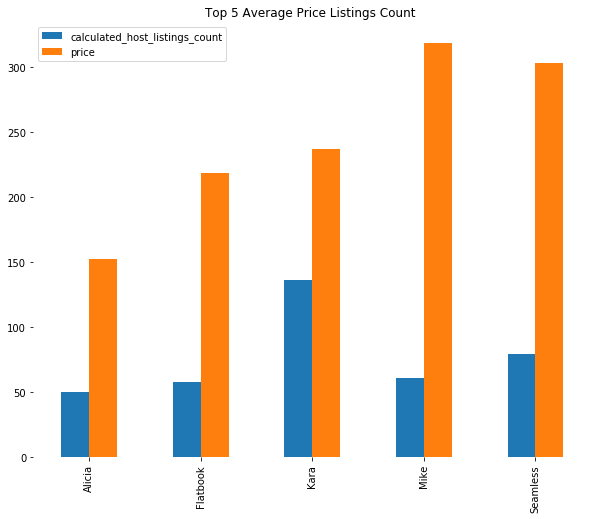

In [193]:
# Create the plot for
ax = total_listings[['calculated_host_listings_count', 'price', 'host_name']].plot(kind='bar', figsize=(10,8), width=0.5)
ax.set_xticklabels(total_listings['host_name'])
ax.set_title('Top 5 Average Price Listings Count ')
for key, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\1.png', dpi=300)
plt.show()

We have five hosts with more than fifty listings, Kara has the most listings with 136, followed by Seamless with 79, and Mike has 61. Host with the name Mike is the most expensive with 318 US dollars average, second is Seamless with 303 US dollars and the cheapest is Alicia with 152 US dollars.      


## And we are going to look at the response time, response rate and acceptance rate of the hosts.

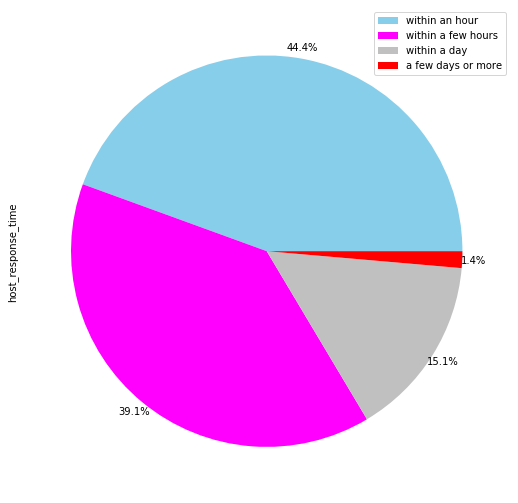

In [194]:
# Create a pie for the host response time
colors = ['skyblue', 'magenta', 'silver', 'red']
listings_host['host_response_time'].value_counts().plot(kind='pie', figsize=(10,9), autopct='%1.1f%%', shadow=False, pctdistance=1.06, labels=None,colors=colors)
plt.legend(labels=listings_host['host_response_time'].value_counts().index, loc='upper right')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\2.png', dpi=300)

In [195]:
# Create a dataframe with the mean values  
response_time = listings_host.groupby(['host_response_time'], as_index=False).mean()
response_time

,host_response_time,host_response_rate,host_acceptance_rate,calculated_host_listings_count,price
0,a few days or more,20.325581,93.767442,1.186047,150.627907
1,within a day,88.872068,75.867804,3.362473,155.127932
2,within a few hours,95.090312,78.850575,30.719212,190.050082
3,within an hour,99.292630,91.373555,4.406069,160.638728


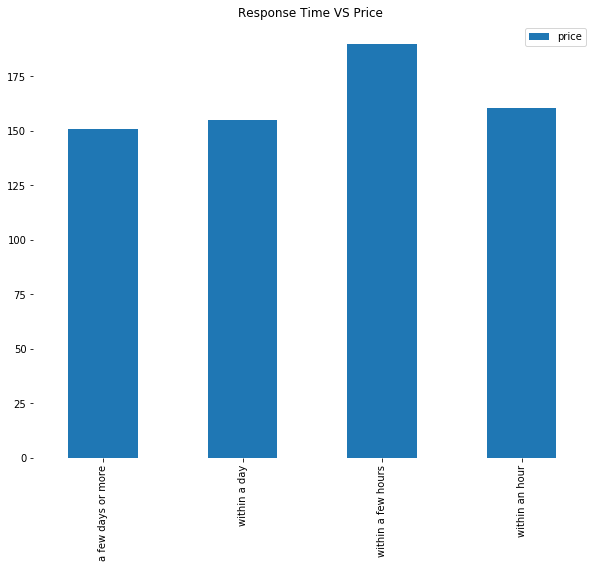

In [196]:
# Create the plot for repsonse time and price
ax = response_time[['host_response_time', 'price']].plot(kind='bar', figsize=(10,8), width=0.5)
ax.set_xticklabels(response_time['host_response_time'])
ax.set_title('Response Time VS Price ')
for key, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\3.png', dpi=300)    
plt.show()

There are four categories for host response time. Most of the hosts around 85% they are responding within a few hours, with 45% of them within an hour. 15% of the host are responding within the day and only 1.5% they need a few days or more to respond. There isn't any clear correlation with the price, but we can see the hosts who are responding within a few hours have a slightly higher average price than the others.

In [197]:
# Create the dataframe for host response rate with mean values
response_rate = listings_host.groupby(['host_response_rate'], as_index=False).mean().sort_values(by=['host_response_rate'])
response_rate

,host_response_rate,host_acceptance_rate,calculated_host_listings_count,price
0,0.0,100.000000,1.000000,202.846154
1,6.0,100.000000,1.000000,130.000000
2,10.0,83.000000,2.000000,167.500000
3,14.0,90.000000,2.000000,222.500000
4,17.0,100.000000,1.000000,175.000000
5,19.0,100.000000,1.000000,70.000000
6,20.0,100.000000,1.000000,240.000000
7,25.0,100.000000,1.000000,229.000000
8,30.0,98.000000,1.000000,168.333333
9,31.0,97.000000,2.000000,100.000000


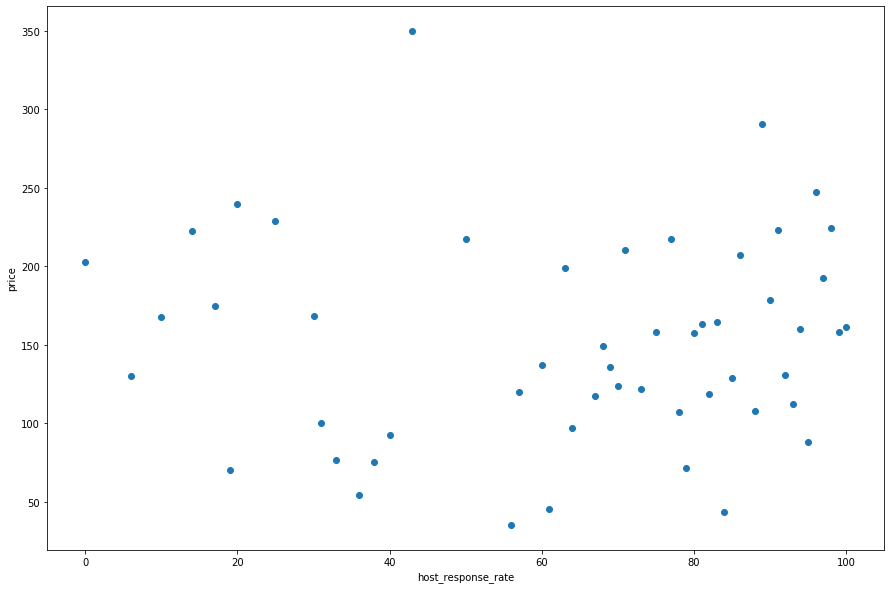

In [198]:
# Single scatter plot
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(response_rate['host_response_rate'], response_rate['price'])
ax.set_xlabel('host_response_rate')
ax.set_ylabel('price')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\4.png', dpi=300)  
plt.show()

In [199]:
# Create the datframe for hosts with response rate 100%
response_rate_name = listings_host.loc[(listings_host['host_response_rate'] > 95) & (listings_host['calculated_host_listings_count'] > 49)]
response_rate_name

,host_name,host_response_time,host_response_rate,host_acceptance_rate,calculated_host_listings_count,price
428,Kara,within a few hours,98.0,55.0,136,169.0
442,Kara,within a few hours,98.0,55.0,136,169.0
443,Kara,within a few hours,98.0,55.0,136,169.0
455,Kara,within a few hours,98.0,55.0,136,349.0
468,Kara,within a few hours,98.0,55.0,136,169.0
...,...,...,...,...,...,...
3102,Mike,within a few hours,96.0,68.0,61,603.0
3104,Mike,within a few hours,96.0,68.0,61,402.0
3106,Mike,within a few hours,96.0,68.0,61,506.0
3539,Mike,within a few hours,96.0,68.0,61,272.0


In [200]:
response_rate_name['host_name'].value_counts()

Kara      136
Mike       61
Alicia     50
Name: host_name, dtype: int64

There is no linear relashionship between price and host_response_rate. A large precentage of the hosts are having rate above 60%. a hosts with around 50% rate has the most expensive listing and those who are above 90% rate they are having a variety of prices from  around 100 US dollars to around 250 US dollars with one listing close to 300 US dollars. There are three hosts with  more than 95%  rate: Mike, Kara, Alicia.

In [201]:
# Create the dataframe for host acceptance rate with mean values
acceptance_rate = listings_host.groupby(['host_acceptance_rate'], as_index=False).mean().sort_values(by=['host_acceptance_rate'])
acceptance_rate

,host_acceptance_rate,host_response_rate,calculated_host_listings_count,price
0,0.0,97.918367,1.367347,166.571429
1,17.0,94.500000,1.000000,180.000000
2,18.0,94.000000,1.000000,145.000000
3,19.0,100.000000,5.000000,288.200000
4,20.0,87.500000,1.500000,116.250000
...,...,...,...,...
67,96.0,97.678571,2.392857,153.357143
68,97.0,96.256410,2.743590,166.256410
69,98.0,82.608247,35.907216,181.670103
70,99.0,98.213333,6.733333,181.386667


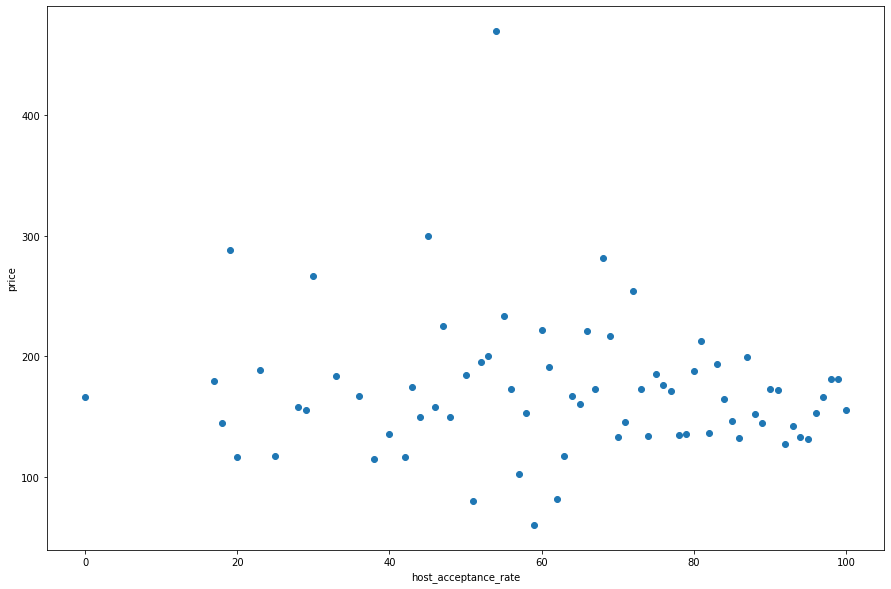

In [202]:
# Single scatter plot
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(acceptance_rate['host_acceptance_rate'], acceptance_rate['price'])
ax.set_xlabel('host_acceptance_rate')
ax.set_ylabel('price')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\5.png', dpi=300)
plt.show()

In [203]:
# Create the dataframe for hosts with rate above 90% and listing above 30
acceptance_rate_name = listings_host.loc[(listings_host['host_acceptance_rate'] > 90) & (listings_host['calculated_host_listings_count'] > 30)]
acceptance_rate_name

,host_name,host_response_time,host_response_rate,host_acceptance_rate,calculated_host_listings_count,price
560,Flatbook,within a few hours,71.0,98.0,58,259.0
562,Flatbook,within a few hours,71.0,98.0,58,269.0
773,Flatbook,within a few hours,71.0,98.0,58,209.0
859,Flatbook,within a few hours,71.0,98.0,58,209.0
867,Flatbook,within a few hours,71.0,98.0,58,229.0
...,...,...,...,...,...,...
3509,Flatbook,within a few hours,71.0,98.0,58,239.0
3513,Flatbook,within a few hours,71.0,98.0,58,269.0
3527,Flatbook,within a few hours,71.0,98.0,58,279.0
3567,Flatbook,within a few hours,71.0,98.0,58,259.0


In [204]:
acceptance_rate_name['host_name'].value_counts()

Flatbook    58
Alicia      50
Name: host_name, dtype: int64

Again there is no relationship between acceptance rate and price. A lot of listing having rate above 60% and a price between 150 US dollars and 250 US dollars. Flatbook and Alicia are having more than 30 listings and rate above 90. Well, we can say Alicia has been a good host and he is trying hard to achieve her goals!

<a id='r'></a>
# 5. Results

We found some of the hosts in Boston, their average price, how many listing they have, and used some metrics to see how the hosts performing. There are five hosts with more than fifty listings, Kara has the most with 136 and Alicia has only 50 listings. The highest average price is for Mike and the lowest for Alicia. Most of the hosts around 85% they are responding within a few hours, with 45% of them within an hour. 15% of the host are responding within the day and only 1.5% they need a few days or more to respond. There are three hosts with more than 95% rate: Mike, Kara, Alicia. Flatbook and Alicia are having more than 30 listings and acceptance rates above 90.  Good job Alicia! 